<a href="https://colab.research.google.com/github/nhanguyene/HOMEWORK_AI_21_05_22/blob/main/CNN_Detect_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries
from keras.datasets import fashion_mnist
from sklearn import utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import RMSprop,Adam
import numpy as np
from keras.utils import np_utils
import pandas as pd
from keras.callbacks import EarlyStopping 
import matplotlib.pyplot as plt


In [2]:
#Import dataset
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [3]:
#Set data type
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

x_train/=255
x_test/=255

y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)


In [4]:
#Create model for train
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),input_shape=(28,28),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [5]:
#Compile and Training
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1,validation_data=(x_test,y_test),callbacks=[EarlyStopping(monitor='val_loss',patience=20)])

Epoch 1/500
469/469 [==============================] - 90s 189ms/step - loss: 0.5222 - accuracy: 0.8140 - val_loss: 0.3749 - val_accuracy: 0.8679
Epoch 2/500
469/469 [==============================] - 82s 176ms/step - loss: 0.3391 - accuracy: 0.8782 - val_loss: 0.3376 - val_accuracy: 0.8815
Epoch 3/500
469/469 [==============================] - 82s 175ms/step - loss: 0.2921 - accuracy: 0.8945 - val_loss: 0.3141 - val_accuracy: 0.8863
Epoch 4/500
469/469 [==============================] - 83s 178ms/step - loss: 0.2597 - accuracy: 0.9057 - val_loss: 0.2801 - val_accuracy: 0.8996
Epoch 5/500
469/469 [==============================] - 83s 176ms/step - loss: 0.2385 - accuracy: 0.9132 - val_loss: 0.2756 - val_accuracy: 0.9019
Epoch 6/500
469/469 [==============================] - 83s 177ms/step - loss: 0.2153 - accuracy: 0.9222 - val_loss: 0.2568 - val_accuracy: 0.9094
Epoch 7/500
469/469 [==============================] - 82s 174ms/step - loss: 0.1982 - accuracy: 0.9267 - val_loss: 0.2619 -

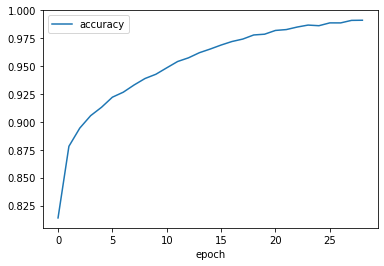

Test error: 0.4804755747318268
Test accuracy:  0.9136999845504761


In [6]:
#Draw plot and make evaluate

plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.show()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test error:',score[0])
print('Test accuracy: ',score[1])

Index ? 52
(10000, 28, 28, 1)
Predicted value:  5
Correct value:  5


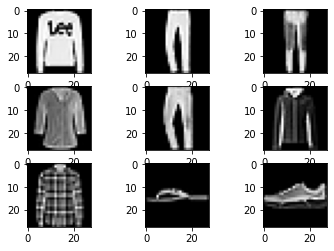

In [7]:
#Make test and predict
n=int(input("Index ? "))
print(x_test.shape)

y_predict = model.predict(x_test[n].reshape(1,28,28,1))
print('Predicted value: ', np.argmax(y_predict))
print('Correct value: ',np.argmax(y_test[n]))

(x_tr,y_tr),(x_t,y_t)=fashion_mnist.load_data()
for i in range(1,10):
  plt.subplot(330+i)
  plt.imshow(x_t[i],cmap='gray')